In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.optimize import fsolve
from scipy.optimize import newton
import scipy as sc
import math
from pyteomics import pepxml
import random
import os
import glob
from collections import deque
import pickle
import importlib as imp
from KDEpy import FFTKDE
from sklearn.metrics import auc
import lower as low
import param_estim as pe
imp.reload(low)
imp.reload(plt)
imp.reload(pe)
lows = low.Tools()
ems = low.EM()
import random
import warnings
import full_analysis as fa
imp.reload(fa)
warnings.filterwarnings("ignore")
#lows.universal_ppf(0.7, 5, 0.1, 0.02)
import numba as nb

In [138]:
v = np.array([1,2,3,4,5])

In [143]:
set(np.where(v<4)[0])

{0, 1, 2}

In [2]:
pos = sorted(glob.glob(os.path.join("/data/dominik/lower_order/validation/", "r*16*pos*pep.xml")))
rands = sorted(glob.glob(os.path.join("/data/dominik/lower_order/validation/", "A*16*random*pep.xml")))
decs = sorted(glob.glob(os.path.join("/data/dominik/lower_order/validation/", "A*16*decoy.pep.xml")))
tar = pos + rands
ref_dict = '/data/dominik/lower_order/validation/Adult_Heart_Gel_Elite_54_f10.pkl'
#paths = ["../validation/tolerance_study/Adult_Heart_Gel_Elite_54_f15.mzXML_LL_no_flank.pep.xml"]
#ref_dict = "/data/dominik/lower_order/validation/20180322_MM_44.pkl"

In [52]:
paths = sorted(glob.glob(os.path.join("/data/dominik/lower_order/datasets/ecoli/", "*21.pep.xml")))
paths

['/data/dominik/lower_order/datasets/ecoli/536BA22_L.mzXML_21.pep.xml']

charge 2, MLE params
0.9838109258544115
charge 2, MM params
0.14220750244344105
charge 3, MLE params
0.9794302591912556
charge 3, MM params
0.989767937493612
charge 4, MLE params
0.9485404128033034
charge 4, MM params
0.983850756873517
0, 'MM'
0.1250501002004008 0.023649199816936087 0.8096192384769538
1, 'MM'
0.1341683366733467 0.017804226086160467 0.7915831663326652
2, 'MM'
0.13767535070140283 0.016667778529752555 0.8056112224448897
MLE params: (0.13927090376083934, 0.02929808300231857), MM: (0.14409050915191696, 0.041702420911027514)
this is charge 0, hit 1
bic mm is -61953.49679301046 and bic mle is -65295.26172670612
difference mle - mm is -3341.76493369566
MLE params: (0.1409681263182691, 0.027913189019239726), MM: (0.14120038553136227, 0.028992454668213968)
this is charge 0, hit 2
bic mm is -74176.75665023075 and bic mle is -74289.04820899514
difference mle - mm is -112.29155876439472
MLE params: (0.1430580373655047, 0.027785831536497156), MM: (0.1404857670260068, 0.0262793730702

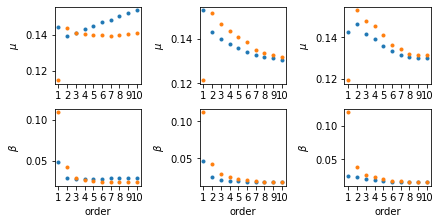

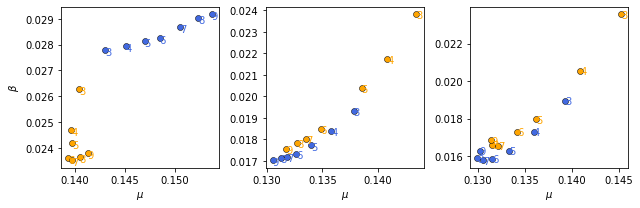

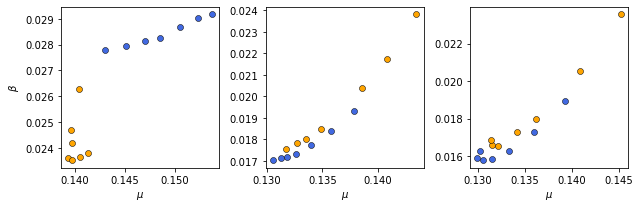

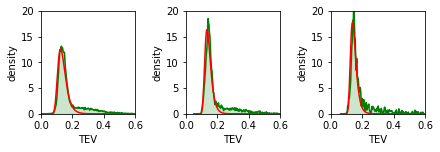

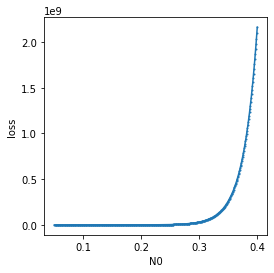

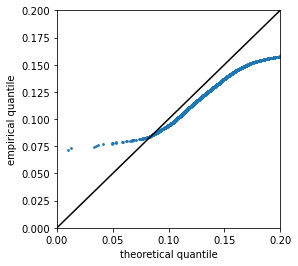

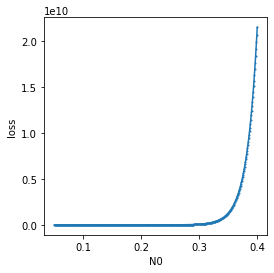

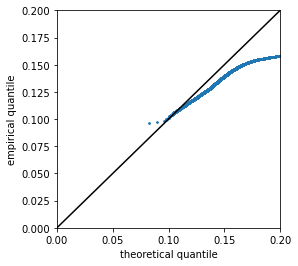

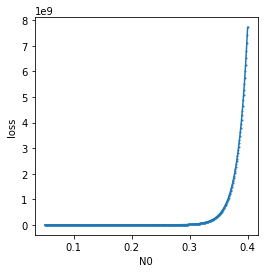

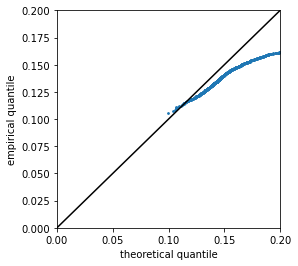

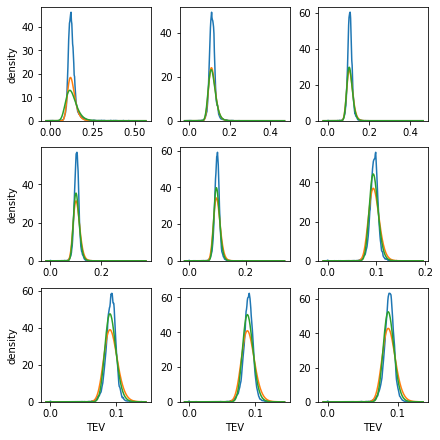

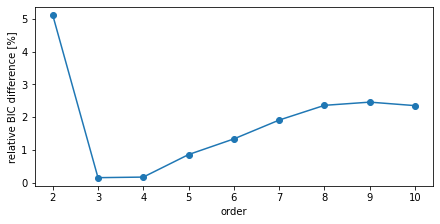

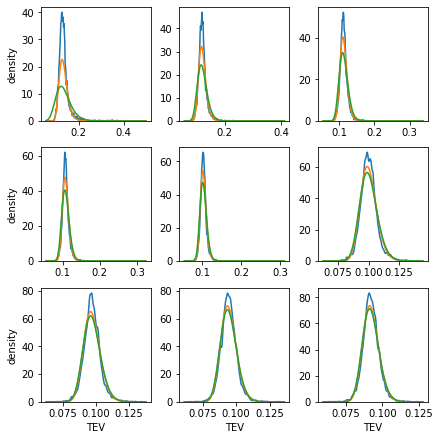

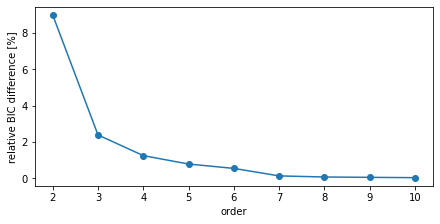

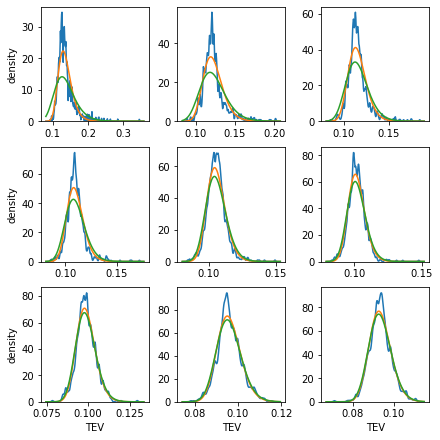

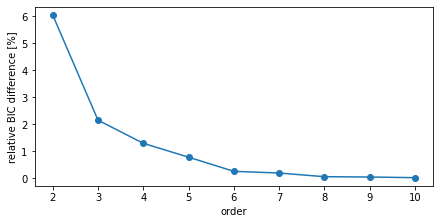

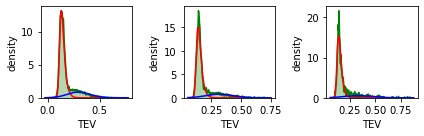

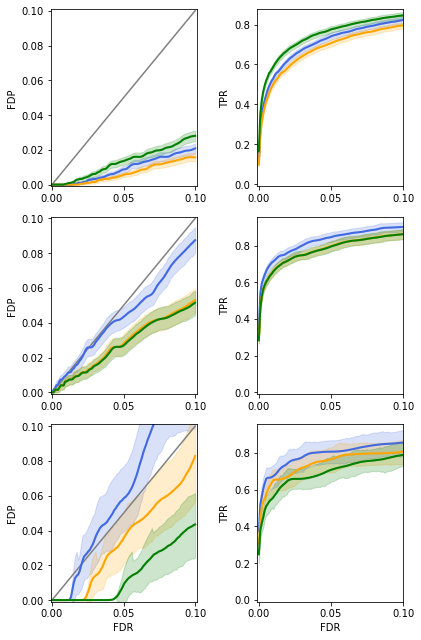

In [160]:
obj = fa.Analyze("human_val_test")
best_params = obj.execute_estimation(tar)
stats = obj.execute_validation(decs+tar, ref_dict)

In [309]:
sample1 = st.gumbel_r.rvs(0.1, 0.02, 10000)
sample2 = st.norm.rvs(0.3, 0.05, 1000)
data = np.concatenate([sample1, sample2])
#p_i = np.ones(len(sample))

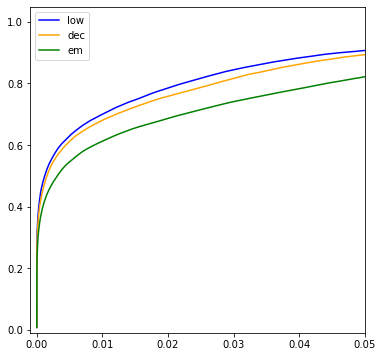

In [167]:
fig, ax = plt.subplots(figsize=(6,6))
ch = 2
cs = ['blue', 'orange', 'green']
for i in range(3):
    ax.plot(stats[ch][i][0][0,:], stats[ch][i][2][0,:], color=cs[i])
    #ax.fill_between(stats[ch][i][0][0,:], stats[ch][i][2][0,:], stats[ch][i][2][1,:], alpha=0.1, color=cs[i])
    #ax.fill_between(stats[ch][i][0][0,:], stats[ch][i][2][0,:], stats[ch][i][2][2,:], alpha=0.1, color=cs[i])
    
ax.legend(["low", "dec", "em"])
ax.set_xlim(-0.001, 0.05)
ax.set_ylim(-0.01,)
fig.savefig("./graphs/test.png", dpi=600)

(1e-05, 0.1)

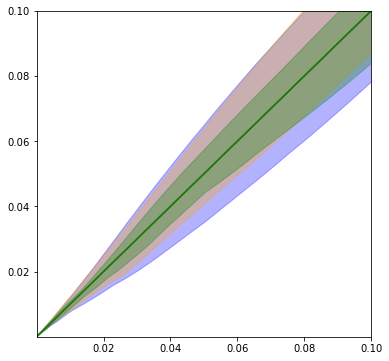

In [190]:
fig, ax = plt.subplots(figsize=(6,6))

ch = 1
cs = ['blue', 'orange', 'green']
for i in range(3):
    fdr = stats[ch][i][0][0,:]
    fdp_m = stats[ch][i][1][0,:]
    cil = stats[ch][i][1][1,:]
    ciu = stats[ch][i][1][2,:]
    cl = cs[i]
    ax.plot(fdr, fdp_m, color=cl)
    ax.fill_between(fdr, fdp_m,ciu, alpha=0.3, color=cl)
    ax.fill_between(fdr, fdp_m, cil, alpha=0.3, color=cl)
ax.set_xlim(10e-6, 0.1)
ax.set_ylim(10e-6, 0.1)
        

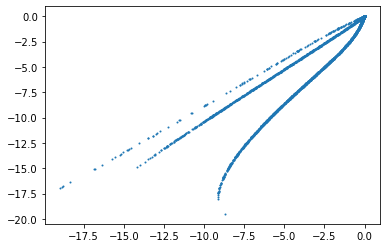

In [100]:
ax.set_title()

In [302]:
#estimate the parameters using various methods

#for both MLE and MM, try to fit LR, if it has R>0.98, keep it, otherwise discard it 

#for both MLE and MM, try mean beta approach, calculate and keep it

#take a sample lower order model, e.g. 5th and use QQ + each of the 4 approaches to find its parameters

#compute BIC for each model 

#select the mode with highest BIC for estimation of top null model

0.9523809523809523

0.07650101304190424
0.10627445537098726 0.031829461296967274 0.12873146536734317 0.06195855380488955 0.8708065274705672
0.09883686786865162 0.01880278624308084 0.25816396735069286 0.08259057042225888 0.9007555340478688
0.1052791535863803 0.030234887890832823 0.14773472006334437 0.07245926931551801 0.8852015755692851
0.09913129875223488 0.019105170602551375 0.27288043845455745 0.07474786013432318 0.8904369800464866
0.10252684677830637 0.02499992112921136 0.20598853465623512 0.0993277748401567 0.8906005833697627
0.09919387810097788 0.019226262864088774 0.27986305839519526 0.06904616585759128 0.8818682916723972
0.09979971117260128 0.0200361601043244 0.2566314195260044 0.09055516431774625 0.8936557683312192
0.0992406099441801 0.01929353232595454 0.28403247518142566 0.06523544965270012 0.8850958091267292
0.09924278564796242 0.019240147874154668 0.27090867243909067 0.07753842431901145 0.8966801762889272
0.09931973383376154 0.019384218554740262 0.28787123917415686 0.061853331899183586 0.89058

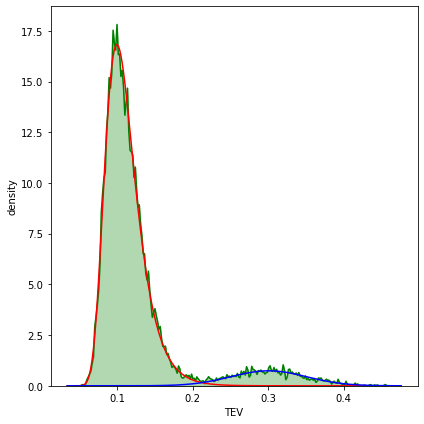

In [310]:
p=ems.em_algorithm(data, 0.124, 0.02, 0.2, 0.1)
print(p)
ems.plot_em(data, p, 'testing')

In [147]:
def em_algorithm(data, old_mu1, old_beta, old_mu2, old_sigma, old_pi0):
    
    #initialize
    pi_j_0 = 0.5*np.ones(len(data))
    error = 100
    
    while error > 0.0001:
        
        new_mu1, new_beta = gumbel_params(data, pi_j_0)
        new_mu2, new_sigma = normal_params(data, 1-pi_j_0)
        
        pi_j_0, new_pi_0 = find_pi(data, old_mu1, old_beta, old_mu2, old_sigma, old_pi0)
        
        error = abs(old_pi0-new_pi_0)/old_pi0
        
        old_mu1, old_beta = new_mu1, new_beta
        old_mu2, old_sigma = new_mu2, new_sigma
        old_pi0 = new_pi_0

        
    return old_mu1, old_beta, old_mu2, old_sigma, old_pi0
        
    

In [336]:
params = em_algorithm(data, 0.2, 0.04, 0.4, 0.05, 0.8)
print(params[:2])

(0.09973267135091538, 0.019861522425905557)


In [130]:
#formulas to find updated parameters

def gumbel_params(data, p_i):
    
    _, guess_beta = lows.mm_estimator(data, 0)
    #print(guess_beta)
    
    new_beta = newton(find_beta, x0=guess_beta, args=(data, p_i))
    new_mu = new_beta*np.log(np.sum(p_i)/np.sum(np.exp(-data/new_beta)*p_i))
    return new_mu, new_beta
    
def find_beta(beta, x, p_i):
    
    mu = beta*np.log(np.sum(p_i)/np.sum(np.exp(-x/beta)*p_i))
    return beta*np.sum(p_i) + np.sum( (x-mu)*(np.exp((mu-x)/beta)-1)*p_i)


def normal_params(data, p_i):
    
    new_mu = np.sum(data*p_i)/np.sum(p_i)
    new_var = np.sum(np.power(data-new_mu, 2)*p_i)/np.sum(p_i)
    
    return new_mu, np.sqrt(new_var)


#formula to find updated pi_0


def find_pi(data, mu_0, beta_0, mu_1, sigma_1, pi_0_old):
    
    f_0 = st.gumbel_r.pdf(data, mu_0, beta_0)*pi_0_old
    f_1 = st.norm.pdf(data, mu_1, sigma_1)*(1-pi_0_old)
    
    pi_j_0 = f_0/(f_0 + f_1)
    #pi_j_1 = 1 - pi_j_0
    
    pi_0_new = np.mean(pi_j_0)
    #pi_1_new = np.mean(pi_j_1)
    
    return pi_j_0, pi_0_new

In [180]:
axes, kde = FFTKDE(bw=0.0005, kernel='gaussian', norm=3).fit(data).evaluate(2**8)
normed = auc(axes, kde)
kde0 = st.gumbel_r.pdf(axes, params[0], params[1])
kde1 = st.norm.pdf(axes, params[2], params[3])

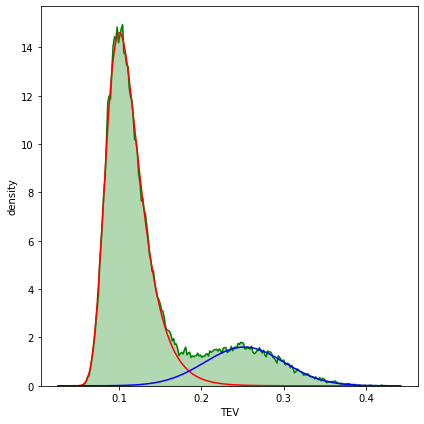

In [198]:
plot_em(data, params, 'sample')

In [197]:
def plot_em(data, params, outname):
    
    axes, kde = FFTKDE(bw=0.0005, kernel='gaussian').fit(data).evaluate(2**8)
    normed = auc(axes, kde)
    kde0 = st.gumbel_r.pdf(axes, params[0], params[1])
    kde1 = st.norm.pdf(axes, params[2], params[3])

    fig, ax = plt.subplots(figsize=(6,6))

    ax.fill_between(axes, kde/normed, color='green', alpha=0.3)
    ax.plot(axes, kde/normed, color='green')
    ax.plot(axes, params[4]*kde0, color='red')
    ax.plot(axes, (1-params[4])*kde1, color='blue')
    ax.set_ylim(0,)
    ax.set_xlabel("TEV")
    ax.set_ylabel("density")
    
    fig.tight_layout()
    fig.savefig(f"./graphs/{outname}.png", dpi=600, bbox_inches='tight')